In [3]:
from data.nexrad import nexrad_to_unity
from datetime import datetime
import os
import numpy as np

### Basic Use
To use this script first you must initalize the nexrad_to_unity object.  The following are arguments for the object initalization: <br><br>

<b>radar</b> (STRING):  The four letter id for the nexrad radar <br>
<b>time</b> (DATETIME): The time you want isosurfaces for in UTC <br>
<b>horizontal_resolution</b> (FLOAT, OPTIONAL): Horizontal resolution of the radar grid in meters. Defaults to 1000.<br>
<b>x_start</b> (FLOAT, OPTIONAL): The distance from the radar in the x direction that the left edge of the box starts in km. Defaults to -100.<br>
<b>x_end</b> (FLOAT, OPTIONAL): The distance from the radar in the x direction that the right edge of the box starts in km. Defaults to 100.<br>
<b>y_start</b> (FLOAT, OPTIONAL): The distance from the radar in the y direction that the bottom edge of the box starts in km. Defaults to -100.<br>
<b>y_end</b> (FLOAT, OPTIONAL): The distance from the radar in the y direction that the top edge of the box starts in km. Defaults to 100.<br>
<b>z_start</b> (FLOAT, OPTIONAL): The bottom of the grid the z direction in km. Defaults to 0.<br>
<b>z_end</b> (FLOAT, OPTIONAL): The top of teh gird in the z direction in km. Defaults to 20.<br>
<b>vertical_resolution</b> (FLOAT, OPTIONAL): Vertical resolution of the radar grid in meters. Defaults to 500.<br>

In [ ]:

rad = nexrad_to_unity("KTLX",
                    datetime(2013,5,31,23,30),
                    horizontal_resolution=250,
                    x_start=-125, 
                    x_end=50, 
                    y_start=-10, 
                    y_end=100, 
                    vertical_resolution=200)

<br>
To check that the settings are coorect you can use the the plot_area method to see the radar area you have selected.


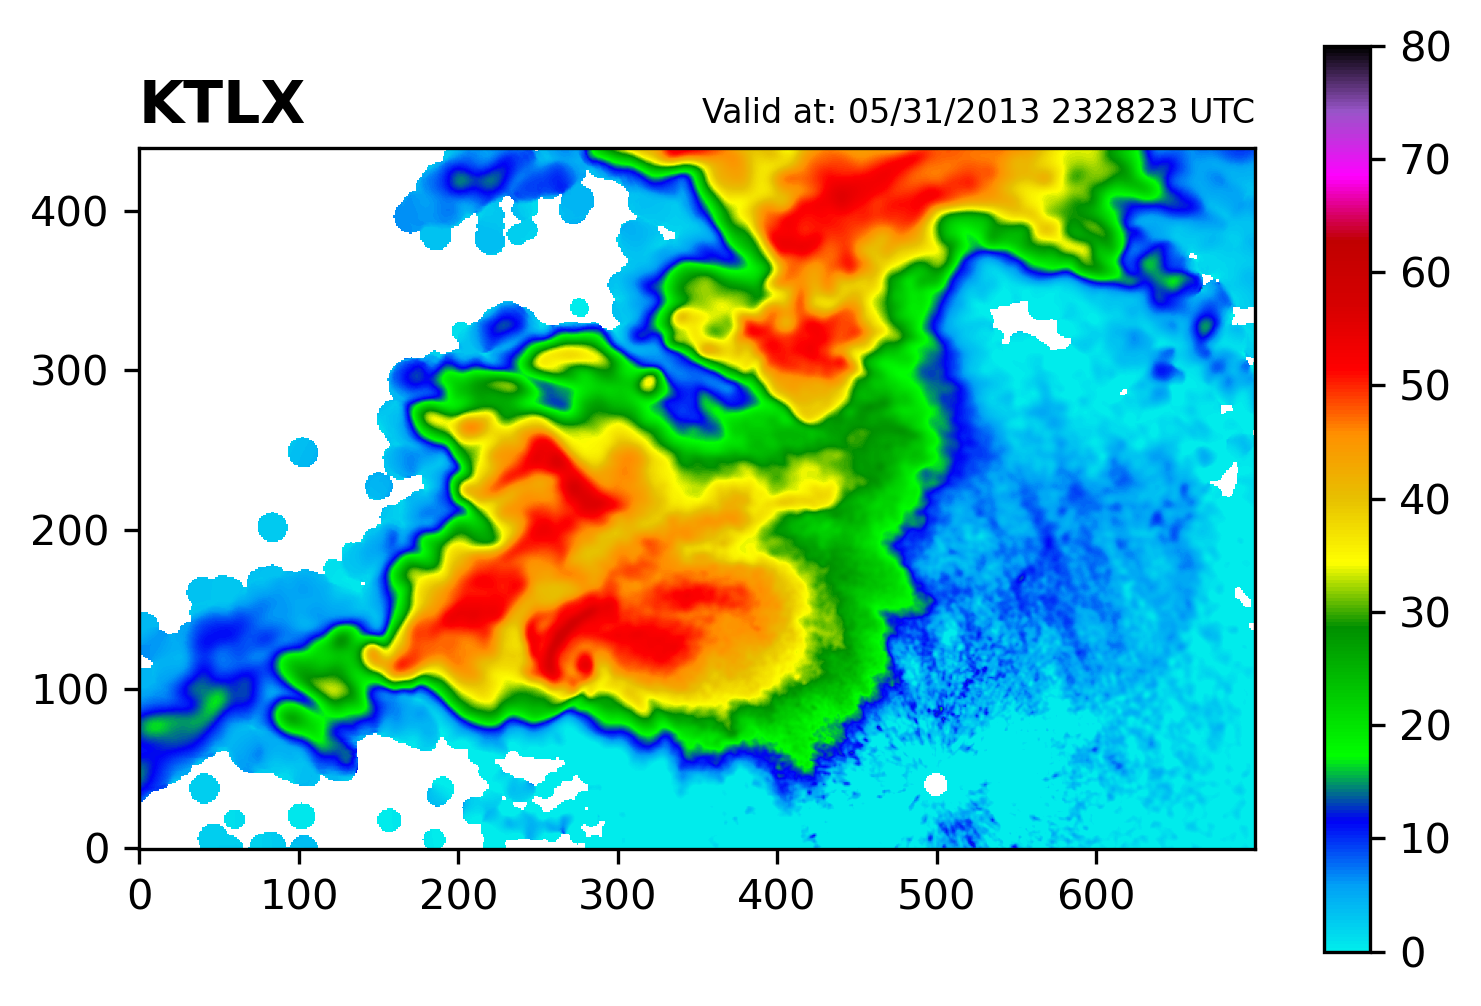

In [3]:
rad.plot_area()

<br>If your settings are incorrect you can use the following methods to change settings.  Arguments are the same as the object initalization.

In [ ]:
rad = rad.change_radar("KTLX",
                    datetime(2013,5,31,23,30),
                    horizontal_resolution=250,
                    x_start=-125, 
                    x_end=50, 
                    y_start=-10, 
                    y_end=100, 
                    vertical_resolution=200)

<br>Finally you can save the isosurface file by using the create_file method.  Arguments for the create_file method are listed below: <br><br>


<b>save_location</b> (STRING): The directory path to where you want the isosurface files saved to<br>
<b>isosurfaces</b> (ARRAY LIKE): The variable values you want isosurfaces for<br>
<b>smooth</b> (BOOL, OPTIONAL): If you want isosurfaces smoothed before they are saved. Defaults to False.<br>
<b>file_type</b> (STRING, OPTIONAL): The isosurface file type you want.  Only .dae and .obj files are available.<br>

In [ ]:
rad.create_file(r"C:\Users\mpvos\OneDrive - UWM\SCSU\Isosurfaces\el_reno_radar" + os.sep, np.arange(20,70,10), file_type="dae", smooth=True)

### Operational Example


In [2]:
import pandas as pd
dates = pd.date_range(start=datetime(2013,5,31,22,30), end=datetime(2013,6,1,0,30), freq="10T")
for date in dates:
    rad = nexrad_to_unity("KTLX", pd.to_datetime(date), horizontal_resolution=750, x_start=-125, x_end=50, y_start=-10, y_end=100, vertical_resolution=100)

    rad.create_file(r"C:\Users\mpvos\OneDrive - UWM\SCSU\Isosurfaces\el_reno_radar" + os.sep, np.arange(20,70,10))
    
    

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Selected file for KTLX at 05/31/2013 222832 UTC

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



KeyboardInterrupt: 